In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('/content/heart_1.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,HeartDisease,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1,1.0,Flat
2,37,M,ATA,130,283,0,?,98,N,0,0.0,Up
3,48,F,ASY,138,214,0,?,108,Y,1,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0,0.0,Up
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1,1.2,Flat
914,68,M,ASY,144,193,1,Normal,141,N,1,3.4,Flat
915,57,M,ASY,130,131,0,Normal,115,Y,1,1.2,Flat
916,57,F,ATA,130,236,0,LVH,174,N,1,0.0,Flat


In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,HeartDisease,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1,1.0,Flat
2,37,M,ATA,130,283,0,?,98,N,0,0.0,Up
3,48,F,ASY,138,214,0,?,108,Y,1,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0,0.0,Up


In [ ]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,HeartDisease,Oldpeak,ST_Slope
913,45,M,TA,110,264,0,Normal,132,N,1,1.2,Flat
914,68,M,ASY,144,193,1,Normal,141,N,1,3.4,Flat
915,57,M,ASY,130,131,0,Normal,115,Y,1,1.2,Flat
916,57,F,ATA,130,236,0,LVH,174,N,1,0.0,Flat
917,38,M,NAP,138,175,0,Normal,173,N,0,0.0,Up


In [ ]:
df.shape

(918, 12)

In [ ]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'HeartDisease', 'Oldpeak',
       'ST_Slope'],
      dtype='object')

In [ ]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP          object
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
HeartDisease        int64
Oldpeak           float64
ST_Slope           object
dtype: object

In [ ]:
df.isna().sum()

Age               0
Sex               9
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
HeartDisease      0
Oldpeak           0
ST_Slope          0
dtype: int64

In [ ]:
# Missing value handling
df['Sex']=df['Sex'].fillna(df['Sex'].mode()[0])
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
HeartDisease      0
Oldpeak           0
ST_Slope          0
dtype: int64

In [ ]:
# Encoding
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
col_encode=['Sex','ChestPainType','RestingBP','RestingECG','ExerciseAngina','ST_Slope']
for col in col_encode:
  df[col]=lb.fit_transform(df[col])
df.dtypes

Age                 int64
Sex                 int64
ChestPainType       int64
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG          int64
MaxHR               int64
ExerciseAngina      int64
HeartDisease        int64
Oldpeak           float64
ST_Slope            int64
dtype: object

In [ ]:
y = df.iloc[:, 8].values
df.drop('HeartDisease',axis=1,inplace=True)
x=df.values
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'],
      dtype='object')

In [ ]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.30,random_state=42)


In [ ]:
# Normalization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
x_test

array([[ 0.99313551, -1.83503323,  0.27242864, ..., -0.83034552,
        -0.81997248,  1.06618689],
       [-0.06370685,  0.54494926,  1.34542979, ..., -0.83034552,
        -0.81997248, -0.61561159],
       [ 1.20450398,  0.54494926, -0.80057251, ..., -0.83034552,
         0.26618089, -0.61561159],
       ...,
       [ 0.25334585,  0.54494926, -0.80057251, ...,  1.20431793,
         0.62823201, -2.29741008],
       [ 0.88745127,  0.54494926,  1.34542979, ...,  1.20431793,
        -0.81997248, -0.61561159],
       [ 0.46471433, -1.83503323,  1.34542979, ..., -0.83034552,
        -0.81997248,  1.06618689]])

In [ ]:
# Model creation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,ConfusionMatrixDisplay
knn = KNeighborsClassifier(n_neighbors=7)
nav=BernoulliNB()
sv=SVC()
model_list=[knn,nav,sv]


Model Begins....
****************************************************************************************************
Classifier - KNeighborsClassifier(n_neighbors=7)
Confusion Matrix:-
[[166   1]
 [  2 107]]
Accuracy score of the model: 0.9891304347826086
--------------------------------------------------
Classification report of KNeighborsClassifier(n_neighbors=7)
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       167
           1       0.99      0.98      0.99       109

    accuracy                           0.99       276
   macro avg       0.99      0.99      0.99       276
weighted avg       0.99      0.99      0.99       276



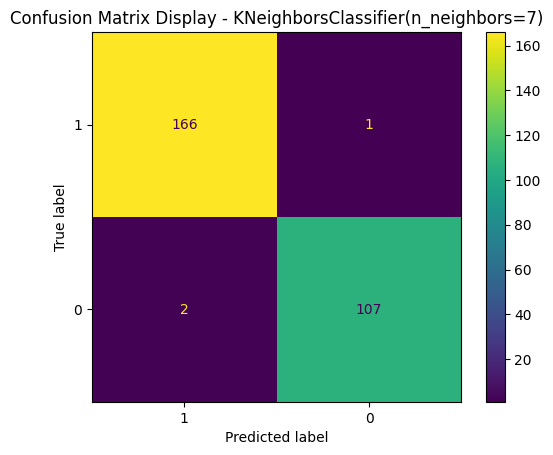


****************************************************************************************************
Classifier - BernoulliNB()
Confusion Matrix:-
[[167   0]
 [  0 109]]
Accuracy score of the model: 1.0
--------------------------------------------------
Classification report of BernoulliNB()
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       167
           1       1.00      1.00      1.00       109

    accuracy                           1.00       276
   macro avg       1.00      1.00      1.00       276
weighted avg       1.00      1.00      1.00       276



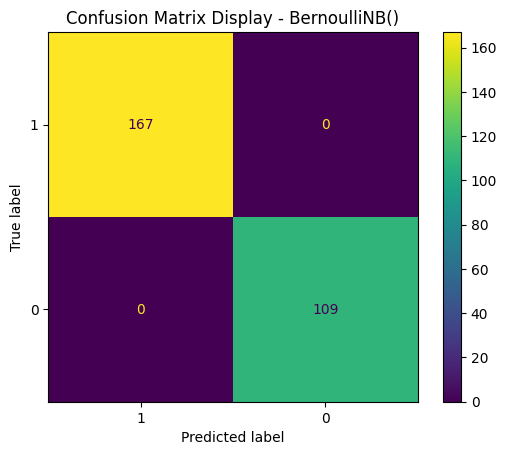


****************************************************************************************************
Classifier - SVC()
Confusion Matrix:-
[[167   0]
 [  0 109]]
Accuracy score of the model: 1.0
--------------------------------------------------
Classification report of SVC()
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       167
           1       1.00      1.00      1.00       109

    accuracy                           1.00       276
   macro avg       1.00      1.00      1.00       276
weighted avg       1.00      1.00      1.00       276



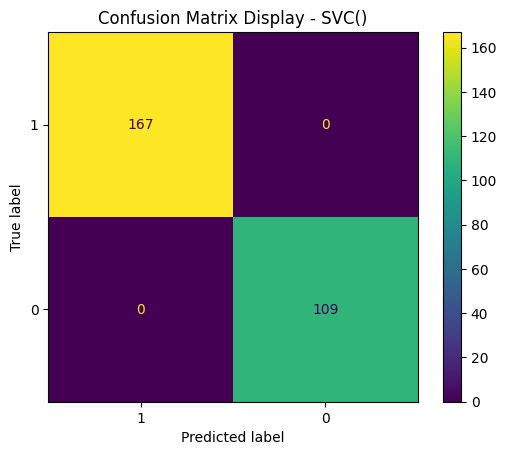

In [ ]:
print("Model Begins....")

for i in model_list:
  print("*"*100)
  print(f"Classifier - {i}")
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print("Confusion Matrix:-")
  print(confusion_matrix(y_test,y_pred))
  print("Accuracy score of the model:",accuracy_score(y_test,y_pred))
  print("-"*50)
  print(f"Classification report of {i}")
  print(classification_report(y_test,y_pred))
  disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=[1, 0])
  disp.plot()
  plt.title(f"Confusion Matrix Display - {i}")
  plt.show()
  print()
